# Introduction
Ethereum is a blockchain platform that supports smart contracts. Smart contracts are pieces of code that perform general-purpose computations. 

Analyisis of the data collected and described in the paper [An exploratory study of smart contracts in the Ethereum blockchain platform](https://link.springer.com/article/10.1007/s10664-019-09796-5).
The data is provided without the code to replicate the analysis here [https://github.com/SAILResearch/replication-smart_contracts_overview/releases/download/v0.1/smart-contracts-Ethereum-metadata.zip](https://github.com/SAILResearch/replication-smart_contracts_overview/releases/download/v0.1/smart-contracts-Ethereum-metadata.zip).

![]()

In [40]:
import zipfile
import os
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests as req
import seaborn as seab

# Data Collection

In [2]:
DATA_PATH = "/Users/cesarsv/Documents/Courses/Computational Python/python-project/data"
DATA_URL = "https://github.com/SAILResearch/replication-smart_contracts_overview/releases/download/v0.1/smart-contracts-Ethereum-metadata.zip"

"""
Download the data from an URL to a given local PATH
"""
def fetch_the_data(data_url=DATA_URL, data_path=DATA_PATH):
    os.makedirs(data_path, exist_ok=True)
    r = req.get(data_url, allow_redirects=True)
    open(os.path.join(DATA_PATH, 'smart-contracts-Ethereum-metadata.zip'), 'wb').write(r.content)


"""
Unzip a file
"""
def extract_zip(zip_file=os.path.join(DATA_PATH, 'smart-contracts-Ethereum-metadata.zip')):
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(DATA_PATH)


"""
Read a CSV file
"""
def read_the_data(data_path=DATA_PATH):
    csv_path = os.path.join(data_path, "smart-contracts-Ethereum-metadata.zip")
    return pd.read_csv(csv_path)


# Download the data
# fetch_the_data()
# print("data fetched")
# extract_zip()
# print("data unzipped")

# Read the Data

In [116]:
df = read_the_data()
print("data has been read")

data has been read


# Descriptive Analysis

In [95]:
df.head()

,address,isERC20,isERC721,blockNumber,blockTimestamp,blockTimestampLastTx,numTx,token_symbol,token_name,token_decimals,...,cycloComplexity,name,cloc_blank,cloc_code,cloc_comment,cloc_comment_ratio,verified,dapp_name,dapp_details_category_csv,dapp_desc
0,0x0000000000b3f879cb30fe243b4dfee438691c04,True,False,4292828,2017-09-19T23:54:47Z,2018-09-05T06:39:32Z,26726,GST2,Gastoken.io,2.0,...,19.0,GasToken2,50.0,167.0,115.0,0.407801,True,NaN,NaN,NaN
1,0x000000002647e16d9bab9e46604d75591d289277,True,False,5171436,2018-02-28T12:58:49Z,NaN,0,FV,FinneyVote,1.0,...,19.0,Vote,46.0,512.0,46.0,0.082437,True,NaN,NaN,NaN
2,0x000000002bb43c83ece652d161ad0fa862129a2c,False,False,5171439,2018-02-28T12:59:54Z,2018-09-06T11:51:36Z,43,NaN,NaN,NaN,...,19.0,AccountRegistry,46.0,512.0,46.0,0.082437,True,FinneyVote,Governance,A forum for controversy
3,0x000000005fbe2cc9b1b684ec445caf176042348e,False,False,5171001,2018-02-28T11:15:16Z,NaN,0,NaN,NaN,NaN,...,19.0,ProperProposal,46.0,512.0,46.0,0.082437,True,NaN,NaN,NaN
4,0x00000084d149ff195c35c1ffaca919cfa92cdffc,True,False,5487880,2018-04-22T20:42:25Z,NaN,0,OPM,OPIUM,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1953337 entries, 0 to 1953336
Data columns (total 35 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   address                    object 
 1   isERC20                    bool   
 2   isERC721                   bool   
 3   blockNumber                int64  
 4   blockTimestamp             |S80   
 5   blockTimestampLastTx       object 
 6   numTx                      int64  
 7   token_symbol               object 
 8   token_name                 object 
 9   token_decimals             float64
 10  token_total_supply         object 
 11  ageDays                    float64
 12  currentIdleTime            float64
 13  cumsumTx                   int64  
 14  cumPercentTx               float64
 15  index                      int64  
 16  indexPercent               float64
 17  numInstructions            float64
 18  numAssemblyBlocks          float64
 19  numSubContracts            float64
 20  nu

# Descriptive Statistics of Numerical Values

In [54]:
df.describe()

,blockNumber,numTx,token_decimals,ageDays,currentIdleTime,cumsumTx,cumPercentTx,index,indexPercent,numInstructions,...,numSubContracts,numLibraries,numLineComments,numBlockComments,loc,cycloComplexity,cloc_blank,cloc_code,cloc_comment,cloc_comment_ratio
count,1.953337e+06,1.953337e+06,89049.000000,1.953337e+06,634462.000000,1.953337e+06,1.953337e+06,1.953337e+06,1.953337e+06,42256.000000,...,42256.000000,42256.000000,42256.000000,42256.000000,42256.000000,42256.000000,42256.000000,42256.000000,42256.000000,42256.000000
mean,4.664285e+06,6.761551e+01,11.495536,2.956754e+02,245.118629,1.317839e+08,9.977892e+01,9.766690e+05,5.000003e+01,141.969756,...,4.333609,0.565222,15.863262,11.714194,326.325445,12.655173,55.637992,188.679738,82.007715,0.259418
std,9.786145e+05,9.497486e+03,8.503855,1.798492e+02,178.226607,1.471078e+06,1.113813e+00,5.638800e+05,2.886752e+01,154.111259,...,3.572579,0.714676,31.154598,19.543762,370.058443,23.193145,64.908607,214.459226,129.029535,0.165701
min,4.640200e+04,0.000000e+00,0.000000,6.481481e-04,0.000336,1.032449e+07,7.817090e+00,1.000000e+00,5.119444e-05,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,4.085693e+06,0.000000e+00,4.000000,1.939238e+02,103.296149,1.319297e+08,9.988936e+01,4.883350e+05,2.500004e+01,60.000000,...,2.000000,0.000000,2.000000,0.000000,119.000000,2.000000,18.000000,74.000000,16.000000,0.118421
50%,4.805711e+06,0.000000e+00,18.000000,2.616116e+02,245.796777,1.320759e+08,1.000000e+02,9.766690e+05,5.000003e+01,87.000000,...,3.000000,0.000000,8.000000,4.000000,211.000000,5.000000,34.000000,111.000000,43.000000,0.282051
75%,5.198188e+06,1.000000e+00,18.000000,4.134486e+02,361.114549,1.320759e+08,1.000000e+02,1.465003e+06,7.500001e+01,162.000000,...,5.000000,1.000000,16.000000,14.000000,374.000000,12.000000,65.000000,217.000000,94.000000,0.400000
max,6.333032e+06,1.032449e+07,255.000000,1.134804e+03,1134.214560,1.320759e+08,1.000000e+02,1.953337e+06,1.000000e+02,4923.000000,...,52.000000,9.000000,1413.000000,403.000000,11409.000000,542.000000,1846.000000,2791.000000,9347.000000,0.977209


# Convert Timestamp to Bytes

In [36]:
df["blockTimestamp"] = df["blockTimestamp"].astype('|S80')
print(df["blockTimestamp"].values[1])

b'2018-02-28T12:58:49Z'


In [37]:
df["block_time"] = np.zeros((df.shape[0]))
for i in range(100):
    s = df.iloc[i,4].astype(str)
    df.iloc[i,-1] = datetime.datetime.strptime(s[0:10], "%Y-%m-%d")

# Plot the Time Series

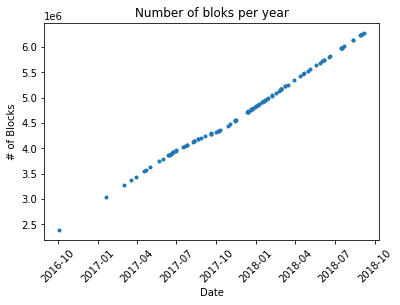

In [49]:
plt.plot(df["block_time"].values[0:100], df["blockNumber"].values[0:100], '.')
plt.xticks(rotation=45)
plt.title("Number of bloks per year")
plt.xlabel("Date")
plt.ylabel("# of Blocks");

# Histogram of LOC

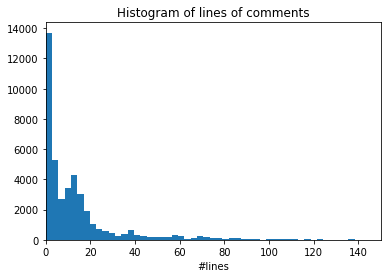

In [50]:
num_line_of_comments = df["numLineComments"]
plt.hist(num_line_of_comments, bins=500)
plt.title("Histogram of lines of comments")
plt.xlabel("#lines")
plt.xlim((0,150));

# Histogram of Cyclomatic Complexity

In [ ]:
cyclomatic_complexity = df["cycloComplexity"]
plt.hist(cyclomatic_complexity, bins=200);

# Histogram Number of Libraries

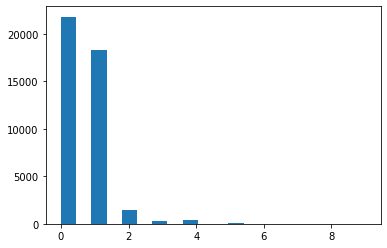

In [52]:
num_libraries = df["numLibraries"]
plt.hist(num_libraries, bins=20);

In [19]:
print(df["dapp_name"].count())
print(df["dapp_details_category_csv"].count())

1402
1371


# Pie Chart of Token Symbols

In [144]:
t = df.loc[0:400,"token_symbol"].astype('|S8')

l = []
for i in range(0,400):
    l.append(t[i].decode('UTF-8'))

DSWP      2
AXP       1
ACI       1
10        1
WIZE      1
AGVC      1
OPM       1
SMC       1
TSR       1
GST2      1
SGX       1
ENVY      1
TLC       1
gnarco    1
NRM       1
GLS       1
CNW       1
FV        1
dtype: int64


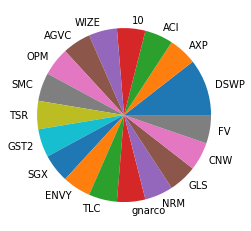

In [145]:
serie = pd.Series(l)
serie = serie[serie != 'nan']
serie = serie.value_counts()
# print(serie)
plt.pie(serie, labels=serie.index.values);

In [134]:
serie[serie != 'nan']

0        GST2
1          FV
4         OPM
5        DSWP
6        DSWP
8         NRM
55         10
67        TSR
70       ENVY
89        CNW
104       SMC
173      WIZE
189       TLC
215    gnarco
261       SGX
269       ACI
357      AGVC
370       AXP
396       GLS
dtype: object

array(['nan', 'DSWP', 'TSR', '10', 'CNW', 'NRM', 'FV', 'OPM', 'ENVY',
       'GST2'], dtype=object)

1953337


<BarContainer object of 2 artists>

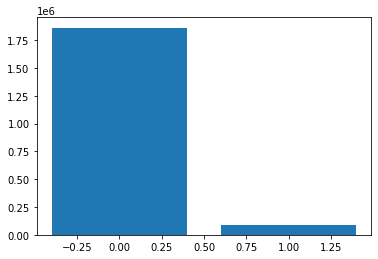

In [37]:
print(df["isERC20"].count())

isERC20 = df.groupby("isERC20").size()
isERC20 = pd.DataFrame(isERC20).T
isERC20
plt.bar(height=isERC20.iloc[0,], x=[False, True])

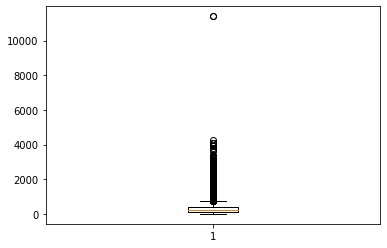

In [46]:
x = df.loc[:,"loc"].values
x = x[np.logical_not(np.isnan(x))]
plt.boxplot(x);
# np.isnan(df.loc[:,"loc"].values)
